In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Helpful Resources
- Numerical Methods in Engineering with Python 3
- [Wikipedia - Finite Difference Coefficient](https://en.wikipedia.org/wiki/Finite_difference_coefficient)
- [Finite Difference Coefficients Calculator](https://web.media.mit.edu/~crtaylor/calculator.html) (For validation only!)

# Taylor Series Expansion

Consider the forward and backward Taylor series of $f(x)$ about $x$, evaluated at $x_{i+1}$ and $x_{i-1}$

$$\begin{align}
f(x_{i+1}) \overset{\Delta}= f(x+h) &= f(x) + f'(x)h + f''(x)\dfrac{h^2}{2!} + f'''(x)\dfrac{h^3}{3!} + f^{(4)}(x)\dfrac{h^4}{4!} + \ldots \tag{1} \\ \nonumber \\
f(x_{i-1}) \overset{\Delta}= f(x-h) &= f(x) - f'(x)h + f''(x)\dfrac{h^2}{2!} - f'''(x)\dfrac{h^3}{3!} + f^{(4)}(x)\dfrac{h^4}{4!} - \ldots \tag{2}\end{align}$$

Also consider the forward and backward Taylor series of $f(x)$ about $x$, evaluated at $x_{i+2}$ and $x_{i-2}$

$$\begin{align}
f(x_{i+2}) \overset{\Delta}= f(x+2h) &= f(x) + 2f'(x)h + 4f''(x)\dfrac{h^2}{2!} + 8f'''(x)\dfrac{h^3}{3!} + 16f^{(4)}(x)\dfrac{h^4}{4!} + \ldots \tag{3} \\ \nonumber \\
f(x_{i-2}) \overset{\Delta}= f(x-2h) &= f(x) - 2f'(x)h + 4f''(x)\dfrac{h^2}{2!} - 8f'''(x)\dfrac{h^3}{3!} + 16f^{(4)}(x)\dfrac{h^4}{4!} - \ldots \tag{4} \end{align}$$

We can combine these equations to estimate numerical derivatives of different types (forward, backward, centered) as well as the order of magnitude of their errors.

### 2-Point Differences
$$\begin{align}
\textbf{Forward:} ~~~ (1) ~~~ \to ~~~ &f'(x_i) = \frac{(x_{i+1})-f(x_{i})}{h} + \mathcal{O}(h) \nonumber \\ \nonumber \\
\textbf{Backward:} ~~~ (2) ~~~ \to ~~~ &f'(x_i) = \frac{(x_{i})-f(x_{i-1})}{h} + \mathcal{O}(h) \nonumber \\ \nonumber \\
\end{align}$$

### 3-Point Differences
$$\begin{align}
\textbf{Centered:} ~~~ (1),(2) ~~~ \to ~~~ &f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{2h} + \mathcal{O}(h^2) \nonumber \\ \nonumber \\
\textbf{Forward:} ~~~ (1),(3) ~~~ \to ~~~ &f'(x_i) = \frac{-3f(x_{i})+4f(x_{i+1})-f(x_{i+2})}{2h} + \mathcal{O}(h^2) \nonumber \\ \nonumber \\
\textbf{Backward:} ~~~ (2),(4) ~~~ \to ~~~ &f'(x_i) = \frac{3f(x_{i})-4f(x_{i-1})+f(x_{i-2})}{2h} + \mathcal{O}(h^2) \nonumber \\ \nonumber \\
\end{align}$$

## Example

Compute the 5-point centered difference equation by hand. Then, compute the 2-point, 3-point, and 5-point differences of the equation

$$y(x) = e^{-x^2} \sin{x}$$

and compare these results to the true (analytical) solution.

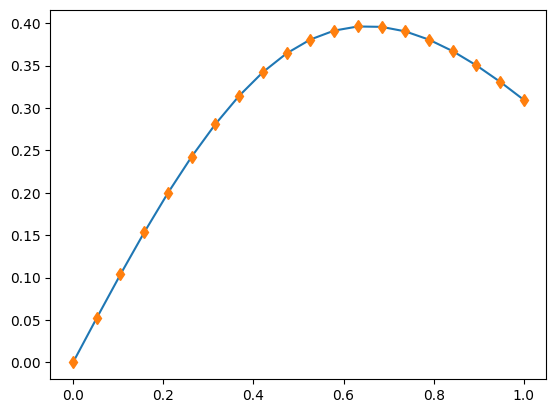

In [2]:
x = np.linspace(0,1,20)
y = np.exp(-x**2)*np.sin(x)

plt.plot(x,y)
plt.plot(x,y,'d')
plt.show()

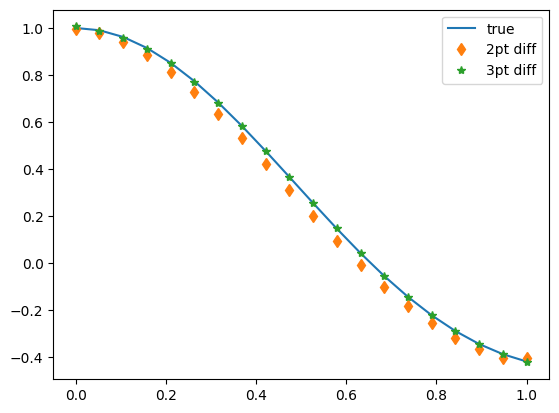

In [7]:
dy_true = -2*x*np.exp(-x**2)*np.sin(x) + np.exp(-x**2)*np.cos(x)

# step size
h = x[1] - x[0]

# 2pt diff
dy_2pt = np.zeros_like(x)
for i in range(0,len(x)):
    if i < len(x)-1:
        # forward difference
        dy_2pt[i] = (y[i+1] - y[i]) / h
    else:
        # backward difference
        dy_2pt[i] = (y[i] - y[i-1]) / h

# 3pt diff
dy_3pt = np.zeros_like(x)
for i in range(len(x)):
    if i == 0:
        # forward diff
        dy_3pt[i] = (-3*y[i] + 4*y[i+1] - 1*y[i+2]) / (2*h)
    elif i == len(x)-1:
        # backward diff
        dy_3pt[i] = (1*y[i-2] - 4*y[i-1] + 3*y[i]) / (2*h)
    else:
        # centered diff
        dy_3pt[i] = (-1*y[i-1] + 1*y[i+1]) / (2*h)

plt.plot(x,dy_true,'-',label='true')
plt.plot(x,dy_2pt,'d',label='2pt diff')
plt.plot(x,dy_3pt,'*',label='3pt diff')
plt.legend()
plt.show()

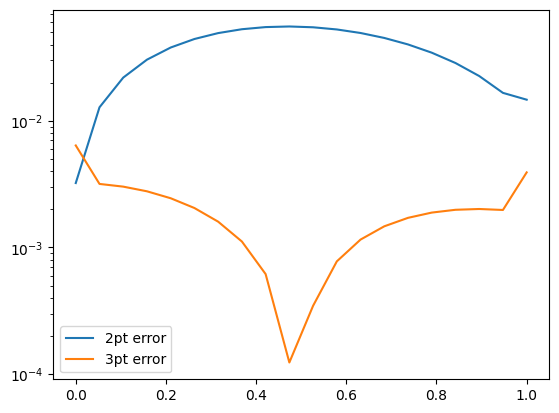

In [9]:
err_2pt = abs(dy_2pt - dy_true)
err_3pt = abs(dy_3pt - dy_true)

plt.semilogy(x,err_2pt,label='2pt error')
plt.semilogy(x,err_3pt,label='3pt error')
plt.legend()
plt.show()

In [20]:
i = 9
print(f'True: {dy_true[i]}')
print(f'2-pt: {dy_2pt[i]}')
print(f'3-pt: {dy_3pt[i]}\n')

print(f'step size: {h:0.4e}')
print(f'2-pt error: {abs(dy_2pt[i] - dy_true[i]):0.4e}')
print(f'3-pt error: {abs(dy_3pt[i] - dy_true[i]):0.4e}')

True: 0.3657364002058087
2-pt: 0.31011412269139893
3-pt: 0.3656128930648326

step size: 5.2632e-02
2-pt error: 5.5622e-02
3-pt error: 1.2351e-04


# Richardson Extrapolation

**The Richardson Extrapolation is a method for boosting the accuracy of certain numerical procedures, including finite difference approximations.**

Suppose we want to estimate the derivative of a function with a finite difference approximation that is known to have an error on the order of $\mathcal{O}(h^n)$. To perform the Richardson extrapolation, we consider applying the finite difference equation with two distinct step sizes, $h_1$ and $h_2$, where $h_1 > h_2$. We assume the derivatives can be expressed in the following form:

$$\begin{align}
f'_{RE} &= f'_{h_1} + c h_1^n \nonumber \\
f'_{RE} &= f'_{h_2} + c h_2^n \nonumber
\end{align}$$

By setting these equations equal to each other, we can solve for $c$.

$$f'_{h_1} + c h_1^n = f'_{h_2} + c h_2^n$$

$$f'_{h_1} + c \left( \frac{h_1}{h_2} h_2 \right)^n = f'_{h_2} + c h_2^n$$

$$c \left( \frac{h_1}{h_2} \right)^n h_2^n - c h_2^n = f'_{h_2} - f'_{h_1}$$

$$c = \frac{f'_{h_2} - f'_{h_1}}{\left[ \left( \frac{h_1}{h_2} \right)^n - 1 \right] h_2^n}$$

Substituting this into the $h_2$ finite difference equation, we get

$$\boxed{f'_{RE} = f'_{h_2} + \frac{f'_{h_2} - f'_{h_1}}{\left[ \left( \frac{h_1}{h_2} \right)^n - 1 \right] }}$$

## Example

Apply the Richardson extrapolation method to boost the accuracy of the 3-point centered finite difference approximation of the function

$$f(x) = e^x$$

evaluated at $x = 0$ using step sizes $h_1 = 0.2$ and $h_2 = 0.1$.

In [26]:
def f(x):
    return np.exp(x)

x = 0

df_true = np.exp(x)

# step sizes
h1 = 0.2
h2 = 0.1
# order of accuracy (3-point)
n = 2

# 3-pt difference
df_1 = (f(x+h1) - f(x-h1)) / (2*h1)
df_2 = (f(x+h2) - f(x-h2)) / (2*h2)

# 5pt diff
df_3 = (1*f(x-2*h1) - 8*f(x-h1) + 8*f(x+h1) - 1*f(x+h1)) / (12*h1)
df_4 = (1*f(x-2*h2) - 8*f(x-h2) + 8*f(x+h2) - 1*f(x+h2)) / (12*h2)

# richardson extrapolation
df_RE = df_2 + (df_2 - df_1) / ((h1/h2)**n - 1)
df_RE2 = df_4 + (df_4 - df_3) / ((h1/h2)**4 - 1)

print(f'True:  {df_true}')
print(f'df_1:  {df_1}')
print(f'df_2:  {df_2}')
print(f'df_RE: {df_RE}')

True:  1.0
df_1:  1.00668001270547
df_2:  1.001667500198441
df_RE: 0.999996662696098


In [23]:
print(f'Error of df_1:  {abs(df_1 - df_true):0.4e}')
print(f'Error of df_2:  {abs(df_2 - df_true):0.4e}')
print(f'Error of df_RE: {abs(df_RE - df_true):0.4e}')

Error of df_1:  6.6800e-03
Error of df_2:  1.6675e-03
Error of df_RE: 3.3373e-06


In [27]:
print('5pt')
print(f'Error of df_1:  {abs(df_3 - df_true):0.4e}')
print(f'Error of df_2:  {abs(df_4 - df_true):0.4e}')
print(f'Error of df_RE: {abs(df_RE2 - df_true):0.4e}')

5pt
Error of df_1:  1.1262e-01
Error of df_2:  9.6857e-02
Error of df_RE: 9.5805e-02
